In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('ufcdata/data.csv')
df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Columns: 145 entries, R_fighter to R_age
dtypes: bool(1), float64(134), int64(1), object(9)
memory usage: 5.7+ MB


In [4]:
df2 = pd.read_csv('ufcdata/raw_fighter_details.csv')
df2.head()

,fighter_name,Height,Weight,Reach,Stance,DOB
0,AJ Fonseca,"5' 4""",145 lbs.,NaN,NaN,NaN
1,AJ Matthews,"5' 11""",185 lbs.,NaN,NaN,NaN
2,AJ McKee,"5' 10""",145 lbs.,NaN,NaN,NaN
3,AJ Siscoe,"5' 7""",135 lbs.,NaN,NaN,NaN
4,Aalon Cruz,"6' 0""",145 lbs.,NaN,NaN,NaN


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 6 columns):
fighter_name    3313 non-null object
Height          3050 non-null object
Weight          3238 non-null object
Reach           1569 non-null object
Stance          2439 non-null object
DOB             2573 non-null object
dtypes: object(6)
memory usage: 155.4+ KB


In [6]:
df3 = pd.read_csv('ufcdata/raw_total_fight_data.csv', sep = ';')
df3.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,...,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52%,47%,99 of 182,59 of 121,...,1 of 1,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo
1,Valentina Shevchenko,Jessica Eye,1,0,8 of 11,2 of 12,72%,16%,37 of 40,42 of 52,...,0 of 0,KO/TKO,2,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,"June 08, 2019","Chicago, Illinois, USA",UFC Women's Flyweight Title Bout,Valentina Shevchenko
2,Tony Ferguson,Donald Cerrone,0,0,104 of 200,68 of 185,52%,36%,104 of 200,68 of 185,...,0 of 0,TKO - Doctor's Stoppage,2,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Lightweight Bout,Tony Ferguson
3,Jimmie Rivera,Petr Yan,0,2,73 of 192,56 of 189,38%,29%,76 of 195,58 of 192,...,4 of 10,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Kevin MacDonald,"June 08, 2019","Chicago, Illinois, USA",Bantamweight Bout,Petr Yan
4,Tai Tuivasa,Blagoy Ivanov,0,1,64 of 144,73 of 123,44%,59%,66 of 146,81 of 131,...,6 of 6,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Heavyweight Bout,Blagoy Ivanov


In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 41 columns):
R_fighter          5144 non-null object
B_fighter          5144 non-null object
R_KD               5144 non-null int64
B_KD               5144 non-null int64
R_SIG_STR.         5144 non-null object
B_SIG_STR.         5144 non-null object
R_SIG_STR_pct      5144 non-null object
B_SIG_STR_pct      5144 non-null object
R_TOTAL_STR.       5144 non-null object
B_TOTAL_STR.       5144 non-null object
R_TD               5144 non-null object
B_TD               5144 non-null object
R_TD_pct           5144 non-null object
B_TD_pct           5144 non-null object
R_SUB_ATT          5144 non-null int64
B_SUB_ATT          5144 non-null int64
R_PASS             5144 non-null int64
B_PASS             5144 non-null int64
R_REV              5144 non-null int64
B_REV              5144 non-null int64
R_HEAD             5144 non-null object
B_HEAD             5144 non-null object
R_BODY             51

In [8]:
for x in df3:
    print(df3[x].value_counts())

Jim Miller            23
Donald Cerrone        22
Diego Sanchez         21
Demian Maia           21
Michael Bisping       21
Matt Hughes           20
Anderson Silva        20
BJ Penn               19
Georges St-Pierre     19
Frankie Edgar         19
Ross Pearson          19
Lyoto Machida         19
Andrei Arlovski       19
Joe Lauzon            19
Frank Mir             19
Thiago Alves          18
Vitor Belfort         18
Gray Maynard          17
Josh Koscheck         17
Rashad Evans          17
Tito Ortiz            17
Clay Guida            17
Chuck Liddell         17
Matt Brown            16
Joseph Benavidez      16
Dustin Poirier        16
Jon Jones             16
Mauricio Rua          16
Gleison Tibau         16
Chris Leben           16
                      ..
Anthony Torres         1
Joe Moreira            1
Jack Hermansson        1
John Maguire           1
Steve Montgomery       1
Bruno Korea            1
Mike de la Torre       1
Bubba Bush             1
Yui Chul Nam           1


In [9]:
df_blue = df[df.Winner == 'Blue']
df_blue.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0
7,Karolina Kowalkiewicz,Alexa Grasso,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Women's Strawweight,3,1.0,...,0.0,0.0,0.0,5.0,Orthodox,160.02,162.56,115.0,25.0,33.0
8,Ricardo Lamas,Calvin Kattar,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Featherweight,3,0.0,...,4.0,3.0,0.0,10.0,Orthodox,172.72,180.34,145.0,31.0,37.0
10,Bevon Lewis,Darren Stewart,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Blue,False,Middleweight,3,1.0,...,0.0,0.0,0.0,0.0,Orthodox,190.50,200.66,185.0,28.0,28.0


In [10]:
df_Red = df[df.Winner == 'Red']
df_Red.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
5,Tatiana Suarez,Nina Ansaroff,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,False,Women's Strawweight,3,0.0,...,1.0,2.0,0.0,4.0,NaN,165.10,167.64,115.0,33.0,28.0
6,Aljamain Sterling,Pedro Munhoz,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,False,Bantamweight,3,0.0,...,1.0,3.0,0.0,9.0,Orthodox,170.18,180.34,135.0,32.0,29.0


In [11]:
df_Red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3470 entries, 0 to 5143
Columns: 145 entries, R_fighter to R_age
dtypes: bool(1), float64(134), int64(1), object(9)
memory usage: 3.8+ MB


In [13]:
df_Red.title_bout.value_counts()

False    3201
True      269
Name: title_bout, dtype: int64

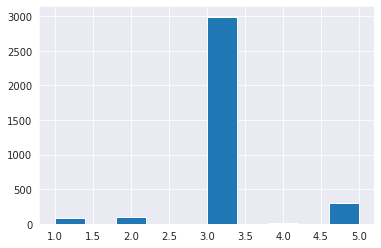

In [17]:
plt.hist(df_Red.no_of_rounds)
plt.show()

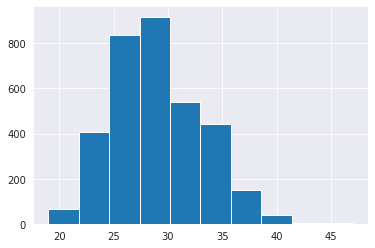

In [16]:
plt.hist(df_Red.R_age)
plt.show()

In [28]:
cols = list(df_Red.select_dtypes(exclude=['object','bool']).columns)

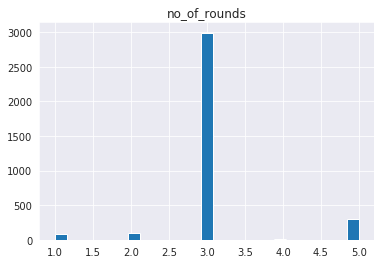

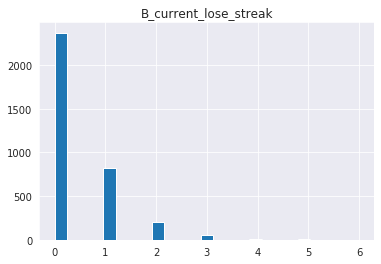

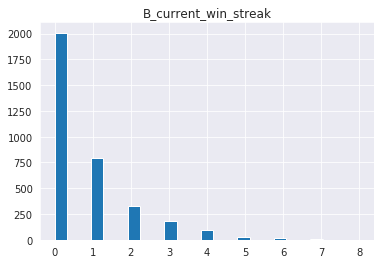

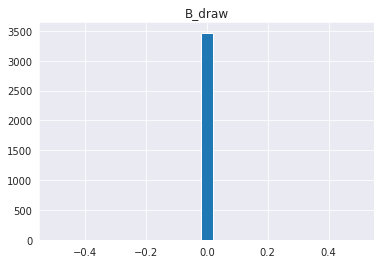

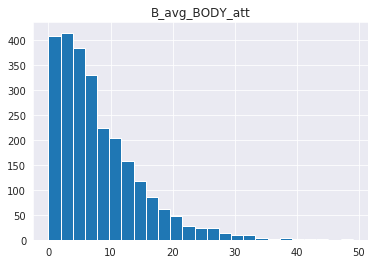

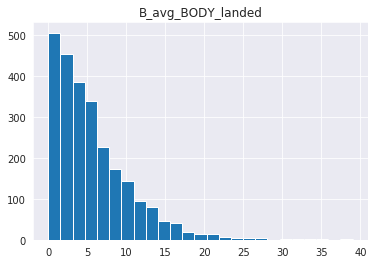

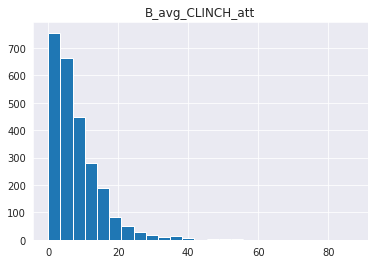

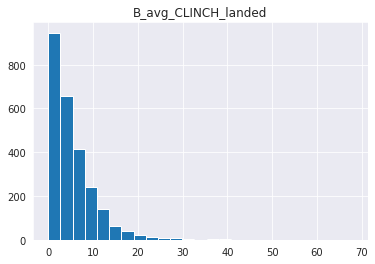

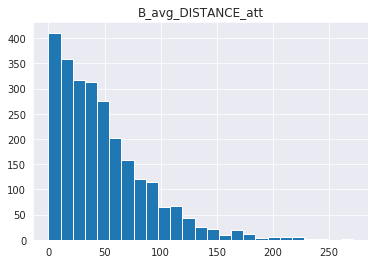

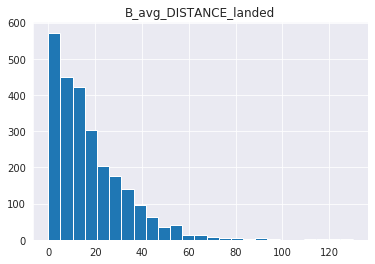

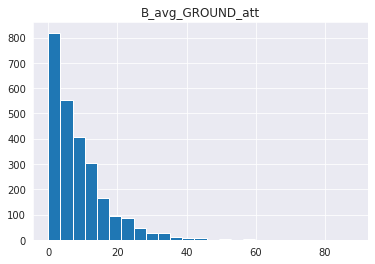

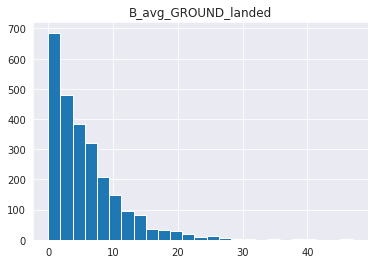

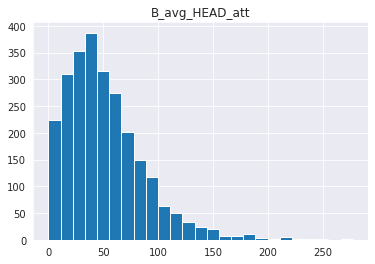

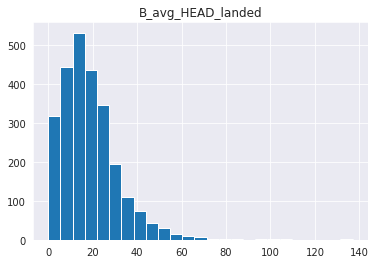

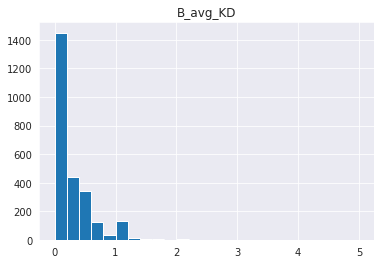

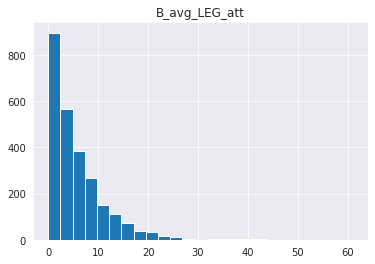

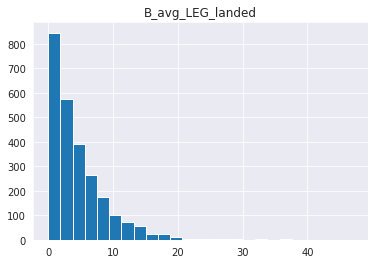

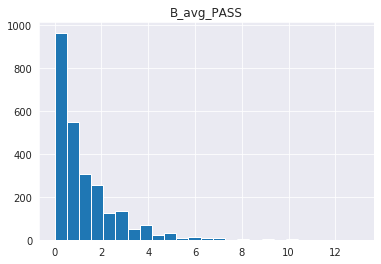

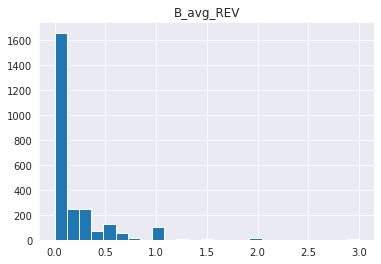

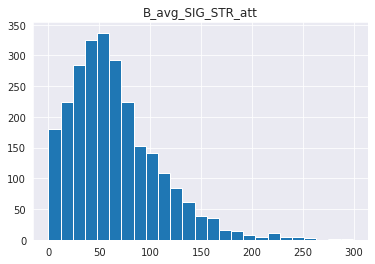

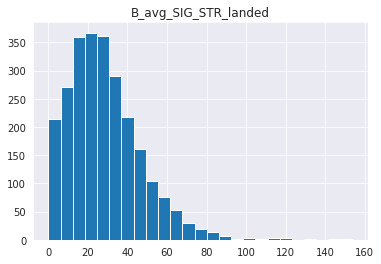

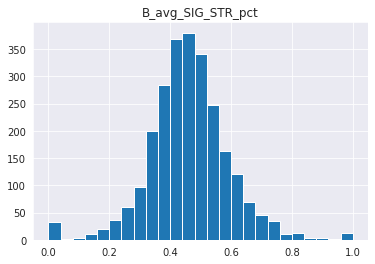

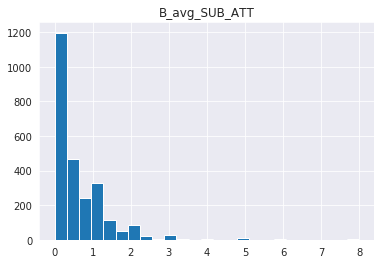

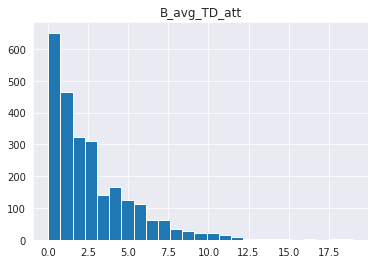

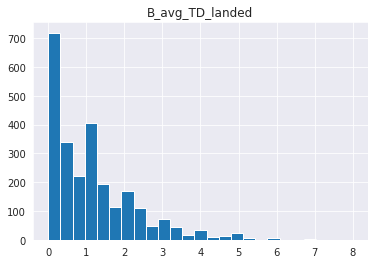

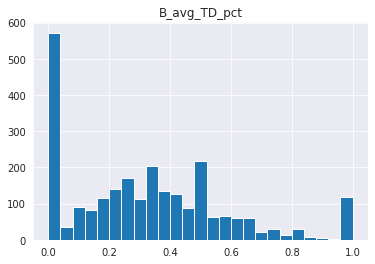

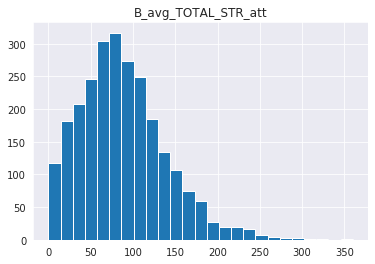

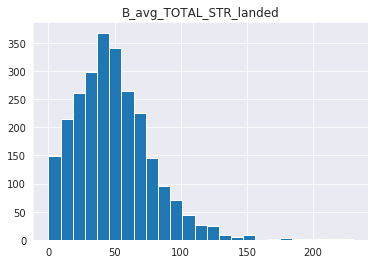

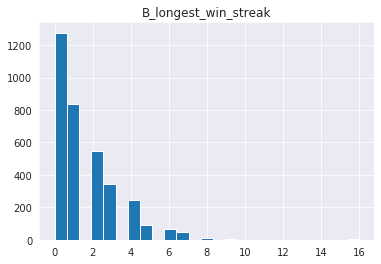

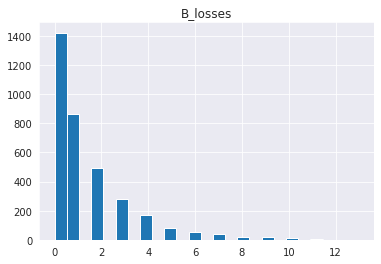

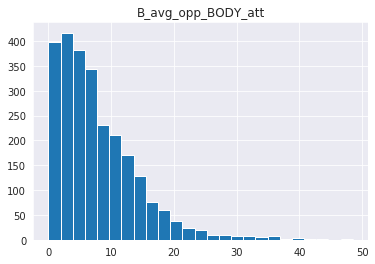

In [ ]:
for col in cols:
    plt.title(col)
    plt.hist(df_Red[col], bins = 25)
    plt.show()